<a href="https://colab.research.google.com/github/DeisyData/BIT_IA_Bootcamp/blob/main/S10_C1_C_means_Fuzzy%2Bkmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 11.5 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzzy

# Parte 1. Generar los datos

In [10]:
centers = [[4,3],
           [10,3]]

In [13]:
sigmas = [[0.1, 0.9],
          [0.5,0.1]]

In [14]:
# Generate test data
np.random.seed(42)  # Set seed for reproducibility
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(200) * xsigma + xmu)) # Arrgeglo unidimensional
    ypts = np.hstack((ypts, np.random.standard_normal(200) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(200) * i))

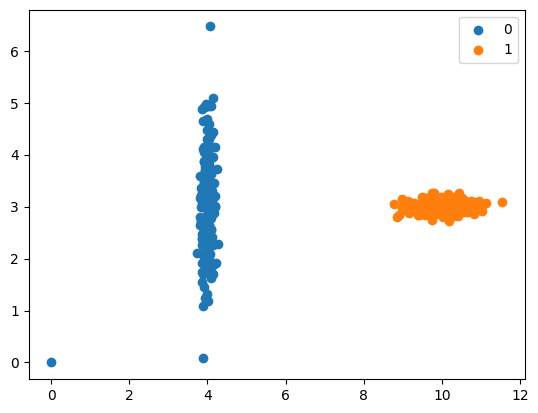

In [15]:
# Visualize
fig, ax = plt.subplots()

for label in range (2):
  ax.scatter(xpts[labels == label], ypts[labels == label], label=label)

ax.legend()
plt.show()

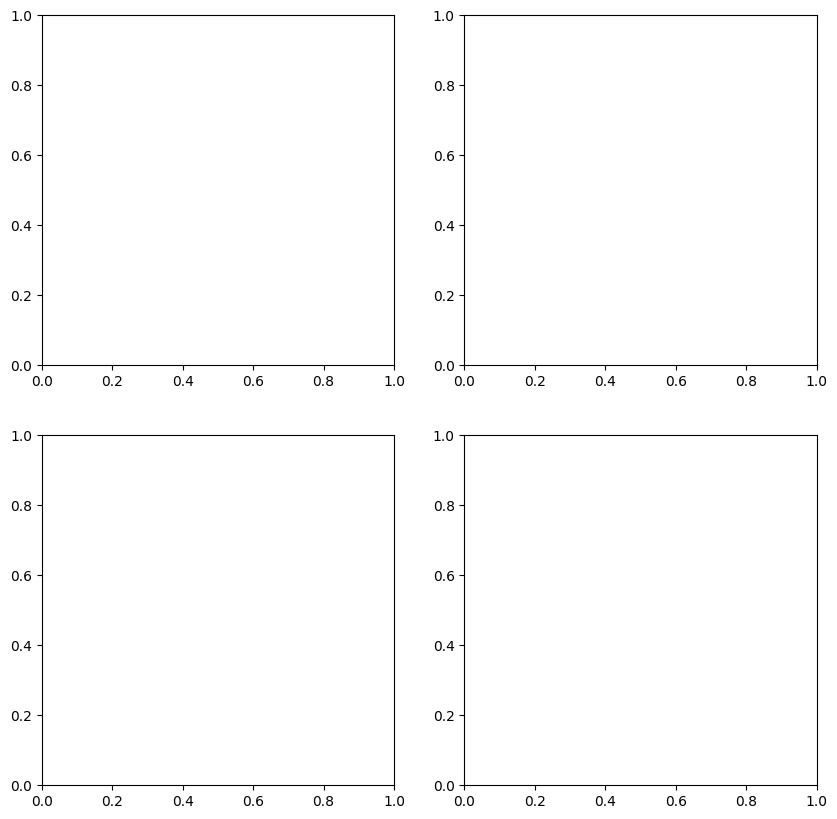

In [18]:
fig1, ax1 = plt.subplots(2,2, figsize=(10,10))
alldata = np.vstack((xpts, ypts)) ## Genera un arreglo bidimensional

for ncenter, ax in enumerate(ax1.reshape(-1), 1):
  cntr, u, u0, d, jm, p, fpc = fuzzy.cluster.cmeans(alldata, ncenter, 2, error=0.005, maxiter=1000)
  fpc.append(fpc)

  cluster_membership = np.argmax(u, axis=0)

  for label in range (2):
    ax.scatter(xpts[cluster_membership == label], ypts[cluster_membership == label], label=label)
# cntr: Contiene loas coordenadas de los centroides
# u : matriz de membresía difusa (0,1)
# u0: matriz inicial utilizada
# d: distancias entre cada uno de los puntos y los centroides
# jm: la función objetivo en cada iteración
# p: cuantas iteracion realizo
# fpc: coeficiente de partición difusa y mide la calidad de la partición

### Proceso
# 1. Incializa centroides y membrecías